<a href="https://colab.research.google.com/github/DineshChopra/AI-ML/blob/master/TensorFlow/Udacity/5_CatsAndDogs_With_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dogs vs Cats Image Classification Without Image Augmentation

In [38]:
import tensorflow as tf

In [39]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [41]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Data Loading

In [42]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

The dataset we have downloaded has the following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

We can list the directories with the following terminal command:

In [43]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [44]:
zip_dir_path = os.path.dirname(zip_dir)
base_dir = os.path.join(zip_dir_path, 'cats_and_dogs_filtered')
base_dir

'/root/.keras/datasets/cats_and_dogs_filtered'

In [45]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_dir
validation_dir

'/root/.keras/datasets/cats_and_dogs_filtered/validation'

In [46]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

### Understanding our data


In [47]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val



In [48]:
print('Total training cat images: ', num_cats_tr)
print('Total training dog images: ', num_dogs_tr)

print('Total validation cat images: ', num_cats_val)
print('Total validation dog images: ', num_dogs_val)

print('--')

print('Total training images: ', total_train)
print('Total validation images: ', total_val)

Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500
--
Total training images:  2000
Total validation images:  1000


### Setting Modal Parameters

In [49]:
BATCH_SIZE = 100 # Number of training examples to process before updating our models variables
IMG_SHAPE = 150 # Our training data consists of images with width of 15- pixels and height of 150 pixels

### Data Preperation

In [50]:
# Generator of our training data
train_image_generator = ImageDataGenerator(rescale=1./255)

# Generator of our validation data
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [51]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = train_dir,
                                                           shuffle=True,
                                                           target_size = (IMG_SHAPE, IMG_SHAPE),
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [52]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = BATCH_SIZE,
                                                           directory = validation_dir,
                                                           shuffle=False,
                                                           target_size = (IMG_SHAPE, IMG_SHAPE),
                                                           class_mode = 'binary')

Found 1000 images belonging to 2 classes.


### Visualizing Training images

In [53]:
sample_training_images, _ = next(train_data_gen)

In [54]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)

  plt.tight_layout()
  plt.show()

In [55]:
IMAGE_SIZE = 150

### Fliping the Image Horizontally

In [56]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMAGE_SIZE, IMAGE_SIZE))

Found 2000 images belonging to 2 classes.


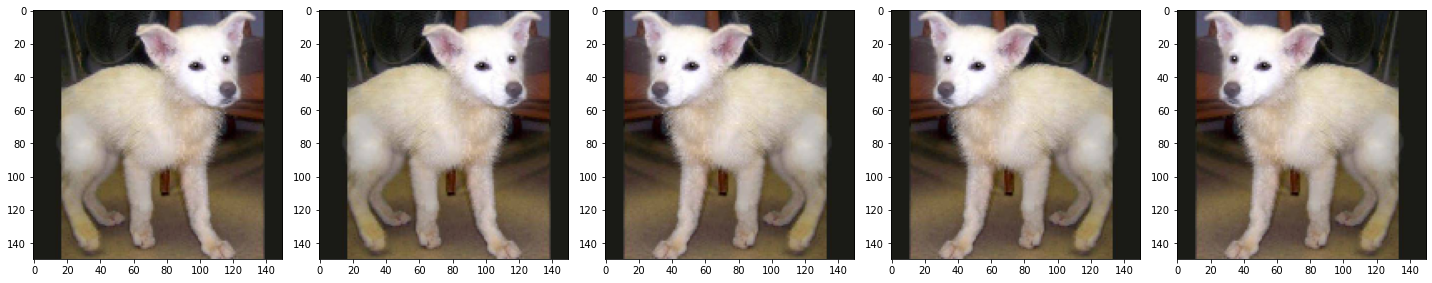

In [57]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Rotate the Image

In [58]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMAGE_SIZE, IMAGE_SIZE))

Found 2000 images belonging to 2 classes.


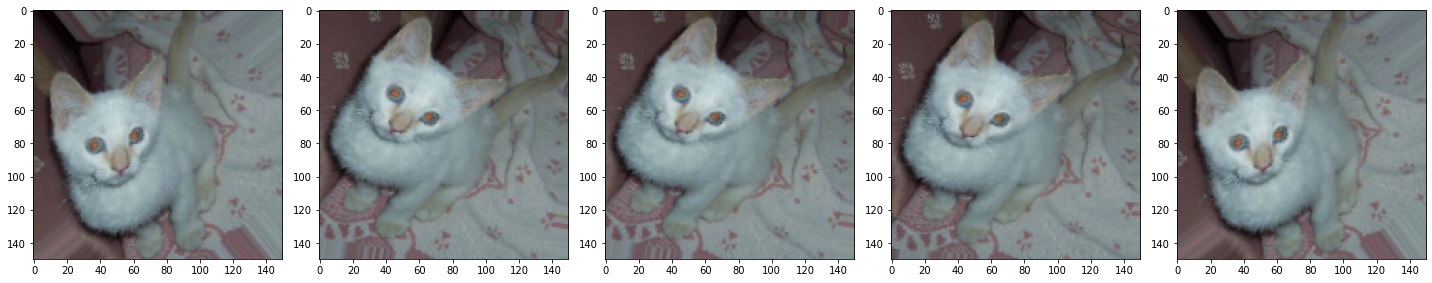

In [59]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Applying Zooming

In [60]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMAGE_SIZE, IMAGE_SIZE))

Found 2000 images belonging to 2 classes.


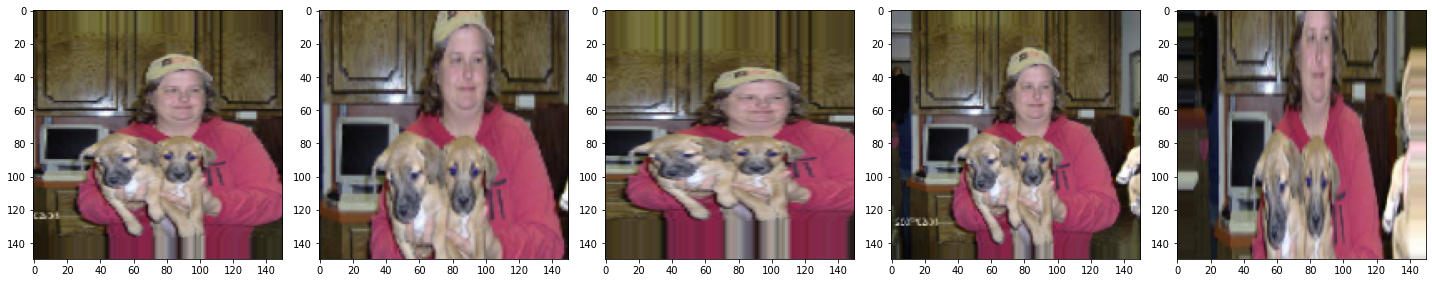

In [61]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Putting all augmentation all together

In [62]:
image_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
train_data_gen = image_gen.flow_from_directory(
    batch_size = BATCH_SIZE,
    directory = train_dir,
    shuffle = True,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


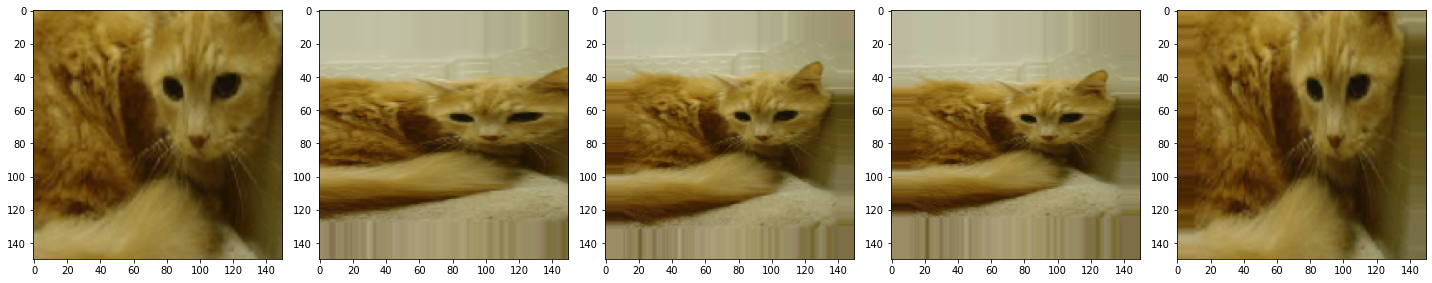

In [63]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

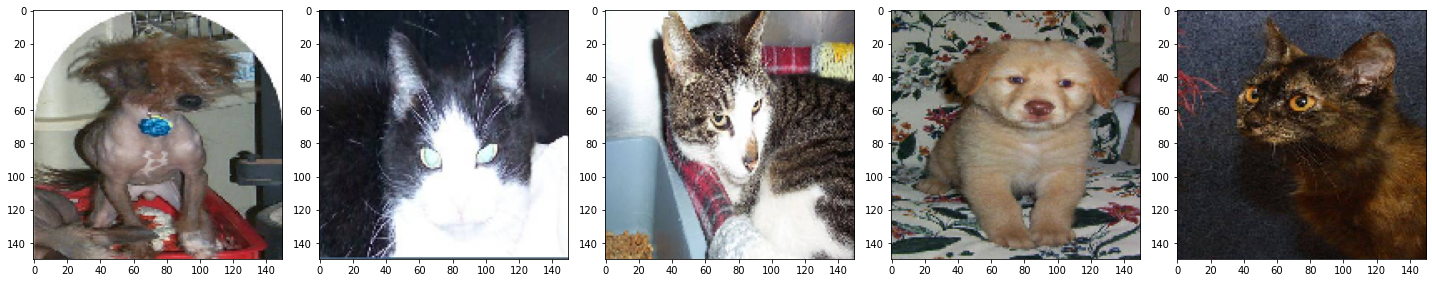

In [64]:
plotImages(sample_training_images[:5])

### Creating Validation Data generator

In [65]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


### Model Creation

In [66]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax'),
])

### Compile the model

In [67]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])


### Model Summary

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

### Train the Model

In [69]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE))),
)

Epoch 1/100
20/20 [==============================] - 17s 836ms/step - loss: 0.6956 - accuracy: 0.5010 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 17s 830ms/step - loss: 0.6881 - accuracy: 0.5545 - val_loss: 0.6723 - val_accuracy: 0.5370
Epoch 3/100
20/20 [==============================] - 16s 813ms/step - loss: 0.6701 - accuracy: 0.5870 - val_loss: 0.6523 - val_accuracy: 0.6250
Epoch 4/100
20/20 [==============================] - 16s 818ms/step - loss: 0.6521 - accuracy: 0.6255 - val_loss: 0.6237 - val_accuracy: 0.6710
Epoch 5/100
20/20 [==============================] - 16s 813ms/step - loss: 0.6330 - accuracy: 0.6410 - val_loss: 0.6213 - val_accuracy: 0.6590
Epoch 6/100
20/20 [==============================] - 16s 811ms/step - loss: 0.6047 - accuracy: 0.6835 - val_loss: 0.6137 - val_accuracy: 0.6710
Epoch 7/100
20/20 [==============================] - 16s 813ms/step - loss: 0.6205 - accuracy: 0.6630 - val_loss: 0.6153 - val_accuracy:

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)
print('epochs_range : ', epochs_range)

epochs_range :  range(0, 100)


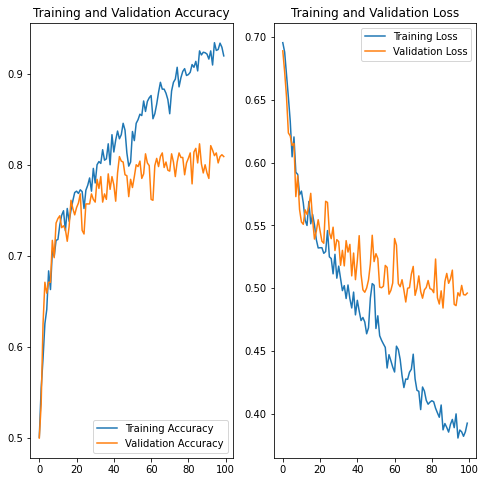

In [71]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')